# Visualizing FordGoBike Data

#### (January 2018 - December 2018)

by Dragos-Georgian Ion

### Table of contents:

* Introduction
* Wrangling (inspecting, assessing and cleaning up the dataset)
* Univariate Exploration
* Bivariate Exploration
* Multivariate Exploration
* Summary
* References

#### Bay Wheels (ex FordGoBike) is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

Historic datasets can be found [here](https://www.lyft.com/bikes/bay-wheels/system-data)

In [139]:
# Importing the necessary packages to start with

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [140]:
# Reading all the csv for 2018 data and concatenating together
folder_name = 'Data'
files = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
df = pd.concat(files, ignore_index=True)
print(df.shape)

(1863721, 14)


In [141]:
df.to_csv('2018-fordgobike.csv') # Saving as a whole csv

In [142]:
df.head(5) # Inspecting the data visually at the beginning

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [143]:
df.info() # Few missing datapoints 

# However, columns related to dates should be in datetime format (to be done in the cleaning process)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [144]:
# Checking for dupes
df[df.duplicated() == True]
# Straightforward, no duplicates

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip


In [145]:
# Checking for NaN values
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

## Cleaning

* Missing values in 4 columns although it might not impact our analysis - no impact on our analysis, can be left like this
* Start_Time & End_Time should be datetime format - done
* User_Type & Bike_share_for_all_trip should be categorical format - done
* For the purpose of the analysis, we can add additional columns extracted from the time related columns (such as month, day of the week) - done
* Create another column for the trip duration in minutes (for easier use) - done
* We should calculate a total distance traveled using the lat/long coordinates - done

In [146]:
# Creating a copy to make the changes upon
df_copy = df.copy()

### Define
* Change start_time & end time to datetime format

### Code

In [147]:
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

### Test

In [148]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 199.1+ MB


### Define
* Change the user_type & bike_share_for_all_trip columns to a categorical type

### Code

In [149]:
df_copy['user_type'] = df_copy['user_type'].astype('category')
df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype('category')

### Test

In [150]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  category      
dtypes: category(2), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 174.2+ MB


### Define
* Create a column for the weekday at the start of the trip
* Create a column for the month at the start of the trip

### Code

In [151]:
df_copy['start_weekday'] = df_copy.start_time.dt.strftime('%A')
df_copy['start_month'] = df_copy.start_time.dt.strftime('%B')

### Test

In [152]:
df_copy.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_weekday,start_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,Wednesday,January
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,Wednesday,January
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,Wednesday,January


### Define
* Create a column for trip duration in minutes

### Code

In [153]:
df_copy['duration_min'] = df_copy['duration_sec']/60

### Test

In [154]:
df_copy.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_weekday,start_month,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,Wednesday,January,1254.733333
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,Wednesday,January,1423.700000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,Wednesday,January,1192.933333
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,Wednesday,January,1017.933333
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,Wednesday,January,666.100000


### Define
Calculate the total distance traveled using the latitude & longitude coordinates

### Code /// Found a easy to understand function on stackoverflow. Reference at the end for future use

In [155]:
import math

def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [156]:
df_copy['distance_km'] = df_copy.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis = 1)

In [157]:
df_copy.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_weekday,start_month,duration_min,distance_km
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,Wednesday,January,1254.733333,2.492254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,Wednesday,January,1423.700000,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,Wednesday,January,1192.933333,2.974502
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,Wednesday,January,1017.933333,2.049710
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,Wednesday,January,666.100000,2.440571


### Now that we have finished our cleaning up process, we will save the dataframe in a clean copy which we will use for our visual exploration.

In [158]:
df_clean = df_copy.copy()
df_clean.to_csv('2018-fordgobike_master.csv')

### Some thoughts so far on the dataset

#### The FordGoBike dataset is very intuitive and easy to understand. It comes in a very clean manner, with very few things that had to be done to it. The dataset that I am using is for the year 2017.

The columns in the dataframe should provide enough information as to what is captured in them:

* Trip Duration:
    - in seconds
* Start Station:
    - ID
    - Name
    - Latitude
    - Longitude
* End Station:
    - ID
    - Name
    - Latitude
    - Longitude
* Bike ID
* User Type:
    - Subscriber
    - Customer

Apart from these I created the following so we can analyze them:

* Month of the trip's start time
* Day of the week of the trip's start time
* Distance (in km)
* Duration (in minutes)


# Univariate Explortion

We can explore the following:

* No of bike trips per month - done
* No of bike trips per day of the week - done
* Trip duration in both seconds and minutes
* Trip distance in km

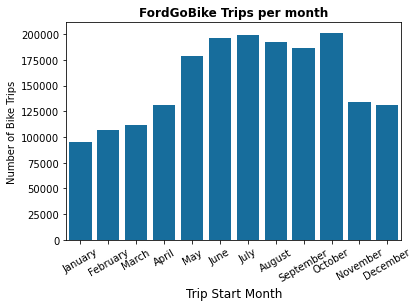

In [159]:
# Let's see how the number of bike trips vary per calendar month

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_cat = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df_clean['start_month'] = df_clean['start_month'].astype(month_cat)

sns.countplot(data=df_clean, x='start_month', color=sns.color_palette('colorblind')[0]);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month', size = 12);
plt.ylabel('Number of Bike Trips');
plt.title('FordGoBike Trips per month', fontweight = 'bold');

### The peak of rides are during sommer months up until late fall, which is expected (most likely correlated with temp)

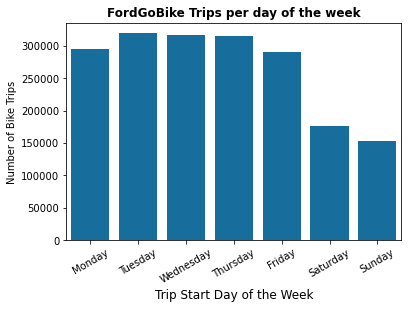

In [160]:
# Let's see how the number of bike trips vary per each day of the week

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df_clean['start_weekday'] = df_clean['start_weekday'].astype(days_cat)

sns.countplot(data=df_clean, x='start_weekday', color=sns.color_palette('colorblind')[0]);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Day of the Week', size = 12);
plt.ylabel('Number of Bike Trips');
plt.title('FordGoBike Trips per day of the week', fontweight = 'bold');

### More rides during weekdays than weekends, indicating most likely that the scheme is used for commutting

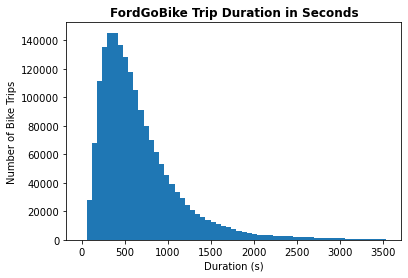

In [161]:
# Now let's explore the duration of the trips both in seconds and in minutes
bin_edges = np.arange(0, 3600, 60) # 60s a minute

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges);

plt.title("FordGoBike Trip Duration in Seconds", fontweight='bold')
plt.xlabel('Duration (s)')
plt.ylabel('Number of Bike Trips');

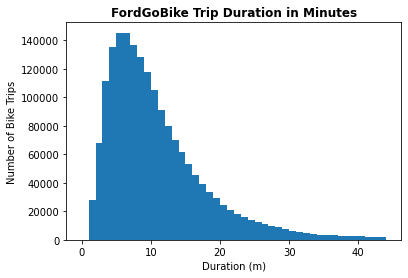

In [162]:
# And in minutes
bins = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]

plt.hist(data = df_clean, x = 'duration_min', bins = bins);

plt.title('FordGoBike Trip Duration in Minutes', fontweight='bold')
plt.xlabel('Duration (m)')
plt.ylabel('Number of Bike Trips');

In [163]:
# Lastly, let's see how the distance looks
df_clean.distance_km.describe()

count    1.863721e+06
mean     1.590929e+00
std      1.028363e+00
min      0.000000e+00
25%      8.675434e-01
50%      1.374590e+00
75%      2.087453e+00
max      6.530925e+01
Name: distance_km, dtype: float64

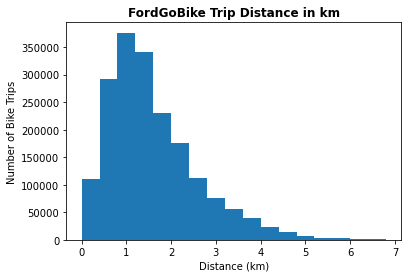

In [164]:
bins = np.arange(0, 7, 0.4)

plt.hist(data = df_clean, x = 'distance_km', bins = bins);

plt.title('FordGoBike Trip Distance in km', fontweight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Bike Trips');

### The average distance traveled in km is just less than 10km. 75% of users travel around 2km.

# Bivariate Exploration

We can explore the following:
* Number of customers vs subscribers (as bike trips) - done
* Customer vs subscriber (as bike trips) per month and per day of the week - done
* Duration of the trip per each type of customer
* Average distance per each type of customer - done

In [165]:
# Let's look through a piechart at the number of customer per each of their category
labels = ['Customer', 'Subscriber']
explode = (0, 0.3)

customers = df_clean.query('user_type == "Customer"').shape[0] # Total number of customers
subscribers = df_clean.query('user_type == "Subscriber"').shape[0] # Total number of subscribers
print (customers, subscribers)
customers_perc = customers/df_clean.shape[0] # Customers as %
subscribers_perc = subscribers/df_clean.shape[0] # Subscribers as %
print (customers_perc, subscribers_perc)

280167 1583554
0.1503266851637128 0.8496733148362872


Text(0.5, 1.0, 'FordGoBike - % Customers vs % Subscribers')

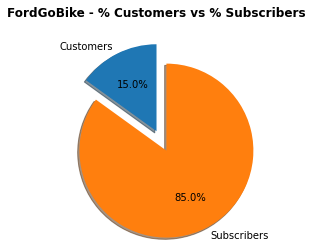

In [166]:
size = [customers_perc, subscribers_perc]
labels = ['Customers', 'Subscribers']
explode = (0, 0.25)


plt.pie(size, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90);
plt.title('FordGoBike - % Customers vs % Subscribers', fontweight = 'bold')

### Incredibly high number of subscribers, much more than I personally expected, indicating the scheme appeal to commuters.

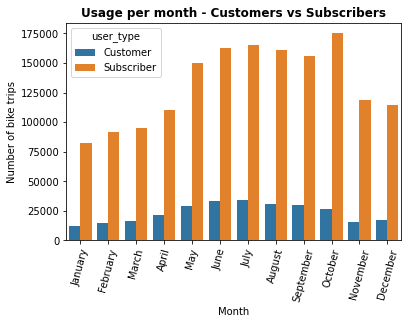

In [167]:
# Let's now look at the number of bike trips between customers and subscribers per month

graph = sns.countplot(data = df_clean, x = 'start_month', hue = 'user_type');
plt.xlabel('Month')
plt.ylabel('Number of bike trips')
plt.title('Usage per month - Customers vs Subscribers', fontweight = 'bold')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);

### Pretty much in line with the overall findings, indicating a linkage with temperature

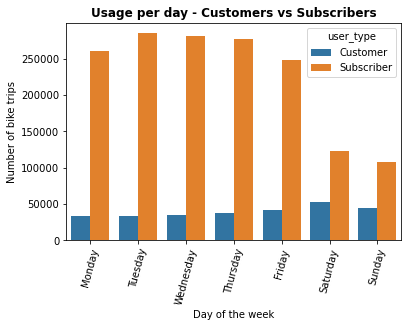

In [168]:
# Let's now look at the number of bike trips between customers and subscribers per day of the week

graph = sns.countplot(data = df_clean, x = 'start_weekday', hue = 'user_type');
plt.xlabel('Day of the week')
plt.ylabel('Number of bike trips')
plt.title('Usage per day - Customers vs Subscribers', fontweight = 'bold')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);

### Here the differences arises, subscribers use the scheme more during weekdays (most likely for commuting), whereas customers use the scheme more during the weekends (for leisure).

(-15.0, 90.0)

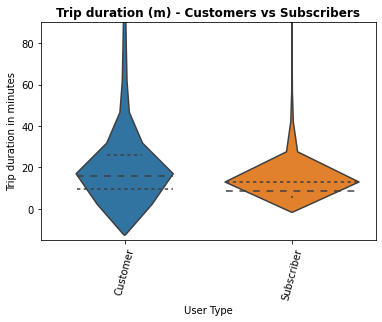

In [169]:
# Let's now at the trip duration between customers and subscribers

graph = sns.violinplot(data = df_clean, x = 'user_type', y = 'duration_min', inner = 'quartile');
plt.xlabel('User Type')
plt.ylabel('Trip duration in minutes')
plt.title('Trip duration (m) - Customers vs Subscribers', fontweight = 'bold')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);
graph.set_ylim(top = 90, bottom = -15)

### Slight more usage by customers than subscribers, although not much of a difference 

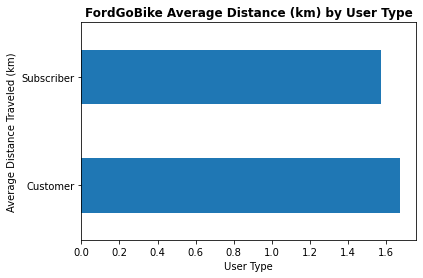

In [170]:
# Lastly, let's see how the distance varies between customers and subscribers (on average)

graph = df_clean.groupby('user_type')['distance_km'].mean().plot(kind='barh');

plt.title('FordGoBike Average Distance (km) by User Type', fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Average Distance Traveled (km)');

### Again, correlated with duration, customers travel a slightly higher distance than subscribers

# Multivariate Exploration

Lastly, we can generate the following:
* Variation of the trip duration per days between customers and subscribers - done
* Variation of the trip duration per months between customers and subscribers - done

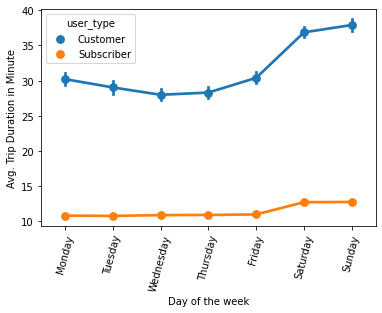

In [171]:
graph = sns.pointplot(data=df_clean, x='start_weekday', y='duration_min', hue='user_type');
plt.title('FordGoBike Trip Duration over days of the week by User Type', fontweight='bold')
plt.xlabel('Day of the week');
plt.ylabel('Avg. Trip Duration in Minute');
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);

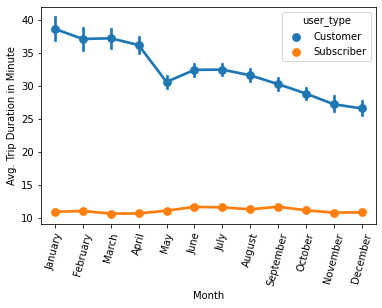

In [172]:
graph = sns.pointplot(data=df_clean, x='start_month', y='duration_min', hue='user_type');
plt.title('FordGoBike Trip Duration over months by User Type', fontweight='bold')
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);